In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
#Pairing cities with our random coordinates
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [6]:
#Let's use pseudocode to map out, at a high level, how we will get the weather data for each city for the website.
#We will need to do the following:

#1.Import our dependencies and initialize counters and an empty list that will hold the weather data.
#2. Loop through the cities list.
#3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
#    *Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
#4. Build the city_url or endpoint for each city.
#5. Log the URL and the record and set numbers.
#6. Make an API request for each city.
#7. Parse the JSON weather data for the following:
#     *City, country, and date
#     *Latitude and longitude
#     *Maximum temperature
#     *Humidity
#     *Cloudiness
#     *Wind speed
#8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7093c9248cd95f528901dd1240b2ebd


In [8]:
#1. Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
#2. Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters. (In the code block, we have initialized the counters at 1 because we want the first iteration of the logging for each recorded response and the set to start at 1.)
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.(endpart is formatting)
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | saskylakh
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | kartuzy
Processing Record 6 of Set 1 | chuy
Processing Record 7 of Set 1 | nelson bay
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | barentsburg
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | dunedin
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | mar del plata
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | nizhneyansk
Processing Record 17 of Set 1 | faanui
Processing Record 18 of Set 1 | ninotsminda
Processing Record 19 of Set 1 | laguna
Processing Record 20 of Set 1 | tasiilaq
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | saint-philippe
Processing Record 23 of Set 1 | shimoda
Processing Record 24 of Set 1 | tingrela
Processing Record 25

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.(endpart is formatting)
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 3 of Set 13 | ushuaia
Processing Record 4 of Set 13 | saskylakh
Processing Record 5 of Set 13 | new norfolk
Processing Record 6 of Set 13 | jamestown
Processing Record 7 of Set 13 | kartuzy
Processing Record 8 of Set 13 | chuy
Processing Record 9 of Set 13 | nelson bay
Processing Record 10 of Set 13 | hilo
Processing Record 11 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 12 of Set 13 | albany
Processing Record 13 of Set 13 | dunedin
Processing Record 14 of Set 13 | bilibino
Processing Record 15 of Set 13 | mar del plata
Processing Record 16 of Set 13 | vaini
Processing Record 17 of Set 13 | rikitea
Processing Record 18 of Set 13 | nizhneyansk
City not found. Skipping...
Processing Record 19 of Set 13 | faanui
Processing Record 20 of Set 13 | ninotsminda
Processing Record 21 of Set 13 | laguna
Processing Record 22 of Set 13 | tasiilaq
Processing Record 23 of Set 13 | hermanus
Processing Record 24 of Set 13 | saint-philippe
Processing Record 25 

In [12]:
len(city_data)

550

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,38.86,70,75,4.61,AR,2021-07-23 01:11:10
1,Saskylakh,71.9167,114.0833,66.29,67,53,9.10,RU,2021-07-23 01:11:10
2,New Norfolk,-42.7826,147.0587,55.71,58,47,4.00,AU,2021-07-23 01:11:10
3,Jamestown,42.0970,-79.2353,65.79,67,1,1.81,US,2021-07-23 01:08:58
4,Kartuzy,54.3342,18.1974,56.57,97,0,3.44,PL,2021-07-23 01:11:11
5,Chuy,-33.6971,-53.4616,50.32,77,100,5.86,UY,2021-07-23 01:11:11
6,Nelson Bay,-32.7167,152.1500,64.11,57,67,1.99,AU,2021-07-23 01:11:12
7,Hilo,19.7297,-155.0900,80.33,80,90,12.66,US,2021-07-23 01:11:12
8,Albany,42.6001,-73.9662,70.63,63,100,3.00,US,2021-07-23 01:06:59
9,Dunedin,-45.8742,170.5036,54.81,57,7,7.00,NZ,2021-07-23 01:07:20


In [14]:
new_column_order = ["City", "Country","Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [15]:
city_data_df = city_data_df[new_column_order] 
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-07-23 01:11:10,-54.8000,-68.3000,38.86,70,75,4.61
1,Saskylakh,RU,2021-07-23 01:11:10,71.9167,114.0833,66.29,67,53,9.10
2,New Norfolk,AU,2021-07-23 01:11:10,-42.7826,147.0587,55.71,58,47,4.00
3,Jamestown,US,2021-07-23 01:08:58,42.0970,-79.2353,65.79,67,1,1.81
4,Kartuzy,PL,2021-07-23 01:11:11,54.3342,18.1974,56.57,97,0,3.44
...,...,...,...,...,...,...,...,...,...
545,Vila,PT,2021-07-23 01:13:39,42.0304,-8.1588,58.75,92,100,3.33
546,Polis,CY,2021-07-23 01:14:17,35.0367,32.4264,76.82,76,0,5.10
547,Iskateley,RU,2021-07-23 01:14:17,67.6803,53.1512,48.58,94,100,10.18
548,Chulman,RU,2021-07-23 01:14:18,56.8479,124.9104,71.94,79,42,10.96


In [16]:
# Create the output file (CSV). [First Create a folder called weather_data in the World_Weather_Analysis folder]
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

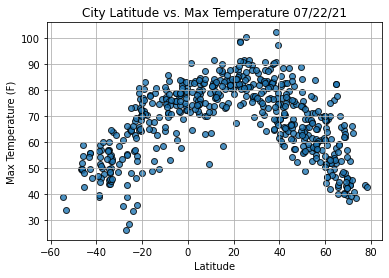

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

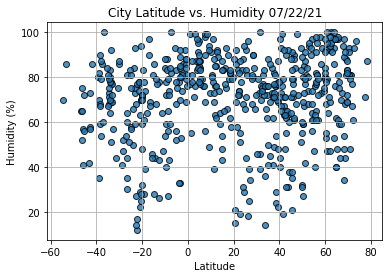

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

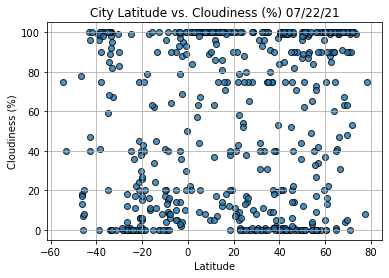

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

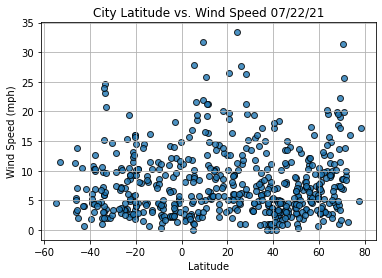

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Saskylakh,RU,2021-07-23 01:11:10,71.9167,114.0833,66.29,67,53,9.10
3,Jamestown,US,2021-07-23 01:08:58,42.0970,-79.2353,65.79,67,1,1.81
4,Kartuzy,PL,2021-07-23 01:11:11,54.3342,18.1974,56.57,97,0,3.44
7,Hilo,US,2021-07-23 01:11:12,19.7297,-155.0900,80.33,80,90,12.66
8,Albany,US,2021-07-23 01:06:59,42.6001,-73.9662,70.63,63,100,3.00


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [25]:
len(northern_hemi_df)

371

In [26]:
len(southern_hemi_df)

179

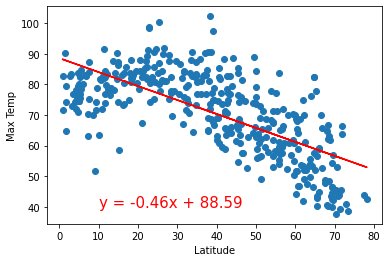

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

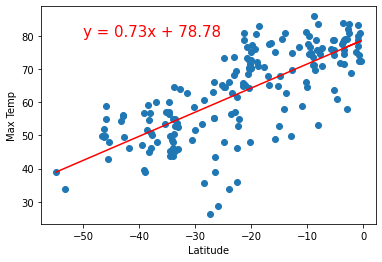

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

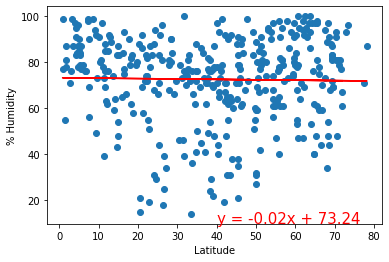

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

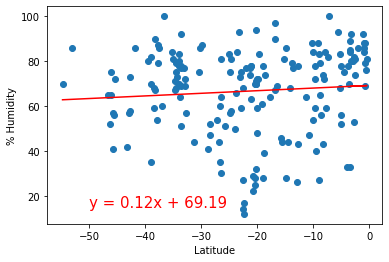

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

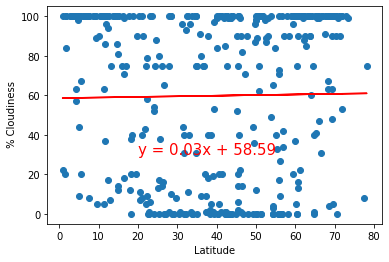

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', ' % Cloudiness',(20,30))

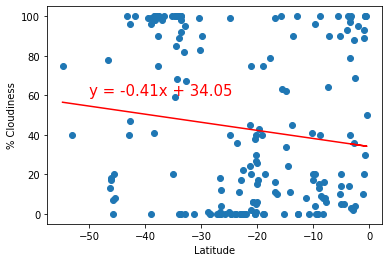

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

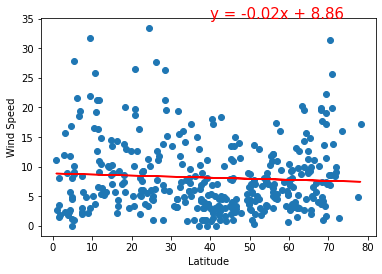

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

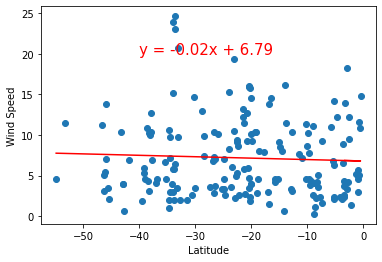

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-40,20))